# Imports

In [15]:
# Here are all of our imports used for data cleaning and manipulation

import pandas as pd
import numpy as np
import os
import shutil
import seaborn as sns
import matplotlib.pyplot as plt

# Cleaning the data

In [16]:
# Here we're reading in the metadata file for the PAD-UFES-20 dataset

rel_path = "../data/metadata/fixed_metadata.csv"

df_pad_ufes = pd.read_csv(rel_path, index_col=0)

# Here we're just making sure if the file doesn't exist, we create it, and if it does, we don't overwrite it
# file_path = "data/df_pad_ufes.csv"

# if not os.path.exists(file_path):
#     df_pad_ufes.to_csv(file_path, index=False)
# else:
#     print("File already exists =  Not overwriting.")

# if not os.path.exists('data/images/train/round1'):
#     os.makedirs('data/images/train/round1')
#     os.makedirs('data/images/train/round2')
#     os.makedirs('data/images/train/round3')
#     os.makedirs('data/images/train/round4')
#     os.makedirs('data/images/train/round5')

In [17]:
# Sorting the data by lesion_id to check for the new lesion IDs whose names we changed
df_pad_ufes = df_pad_ufes.sort_values(["lesion_id"]) 

cancer_conditions = ["BCC", "MEL", "SCC"]
no_cancer_conditions = ["ACK", "NEV", "SEK"]

def label_diagnostic(diagnostic):
    if diagnostic in cancer_conditions:
        return 'Skin cancer'
    elif diagnostic in no_cancer_conditions:
        return 'Skin disease'


# Applying the function to the 'diagnostic' column to create a new 'cancer_label' column
df_pad_ufes['cancer_label'] = df_pad_ufes['diagnostic'].apply(label_diagnostic)
df_pad_ufes

,patient_id,lesion_id,smoke,drink,background_father,background_mother,age,pesticide,gender,skin_cancer_history,...,diagnostic,itch,grew,hurt,changed,bleed,elevation,img_id,biopsed,cancer_label
1244,PAT_88,1,False,True,GERMANY,POMERANIA,65,True,MALE,True,...,BCC,False,True,False,False,False,True,PAT_88_1_64.png,True,Skin cancer
7,PAT_117,2,False,False,POMERANIA,POMERANIA,74,True,FEMALE,False,...,BCC,True,True,True,False,True,True,PAT_117_2_983.png,True,Skin cancer
497,PAT_90,3,False,False,POMERANIA,POMERANIA,74,False,FEMALE,False,...,SEK,False,False,False,False,False,True,PAT_90_3_648.png,False,Skin disease
214,PAT_256,4,False,False,POMERANIA,POMERANIA,90,False,FEMALE,True,...,SEK,False,True,False,False,False,True,PAT_256_4_583.png,False,Skin disease
1751,PAT_91,5,False,False,ITALY,PORTUGAL,65,True,MALE,False,...,ACK,True,False,False,False,False,False,PAT_91_5_332.png,False,Skin disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1893,PAT_2159,4792,NaN,NaN,NaN,NaN,35,NaN,NaN,NaN,...,NEV,False,True,False,False,False,False,PAT_2159_4792_718.png,False,Skin disease
1602,PAT_2160,4814,NaN,NaN,NaN,NaN,76,NaN,NaN,NaN,...,ACK,False,False,False,False,False,False,PAT_2160_4814_243.png,False,Skin disease
1322,PAT_2161,4818,NaN,NaN,NaN,NaN,6,NaN,NaN,NaN,...,NEV,False,True,False,False,False,True,PAT_2161_4818_501.png,False,Skin disease
2122,PAT_2161,4819,NaN,NaN,NaN,NaN,6,NaN,NaN,NaN,...,NEV,False,False,False,False,False,False,PAT_2161_4819_719.png,False,Skin disease


## Some data exploration

In [18]:
# Removing all the rows that doesn't have an entry in the "gender" column, as that"s what we're focusing on
df_pad_ufes = df_pad_ufes[~df_pad_ufes["gender"].isna()]
# Here we're dropping the duplicates, but keeping the first occurence of the lesion_id
df_pad_ufes = df_pad_ufes.drop_duplicates("lesion_id", keep = "first")


# assert (df_pad_ufes.lesion_id.is_unique)


# Grouping the counts of the diagones and genders, then we're making a pivot table to make it easier to read
gender_diagnostic_counts = df_pad_ufes.groupby(["gender", "diagnostic"]).size().reset_index(name="count")
gender_diagnostic_pivot = gender_diagnostic_counts.pivot(index="diagnostic", columns="gender", values="count")#.fillna(0)

print(gender_diagnostic_pivot)
print(df_pad_ufes.shape)


gender      FEMALE  MALE
diagnostic              
ACK            135   113
BCC            311   341
MEL             19    17
NEV             41    22
SCC             71    74
SEK             22    13
(1179, 27)


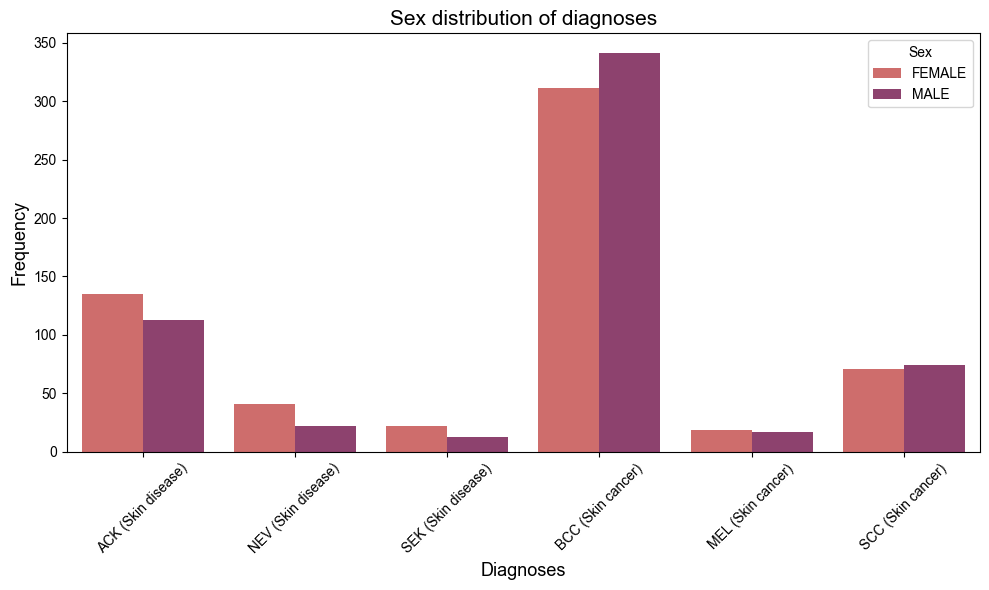

In [19]:
# Remove rows with missing 'gender' and drop duplicate 'lesion_id'
df_pad_ufes = df_pad_ufes[df_pad_ufes["gender"].notna()]
df_pad_ufes = df_pad_ufes.drop_duplicates("lesion_id", keep="first")



# Define a custom order for the x-axis, mapping diagnostics to labels
custom_order = [
    'ACK (Skin disease)', 'NEV (Skin disease)', 'SEK (Skin disease)', 
    'BCC (Skin cancer)', 'MEL (Skin cancer)', 'SCC (Skin cancer)'
]

# Prepare a pivot table for plotting
df_pad_ufes['diagnostic_info'] = df_pad_ufes['diagnostic'] + " (" + df_pad_ufes['cancer_label'] + ")"
gender_diagnostic_counts = df_pad_ufes.groupby(["gender", "diagnostic_info"]).size().reset_index(name="count")
gender_diagnostic_pivot = gender_diagnostic_counts.pivot(index="diagnostic_info", columns="gender", values="count").reindex(custom_order)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=gender_diagnostic_counts, x="diagnostic_info", y="count", hue="gender", palette="flare", order=custom_order)
plt.title("Sex distribution of diagnoses", fontsize=15)
plt.xlabel("Diagnoses", fontsize=13)
plt.ylabel("Frequency", fontsize=13)
plt.xticks(rotation=45)
legend = plt.legend(title="Sex")
sns.set_style("whitegrid")
plt.tight_layout() 


plt.savefig("plots/diagnoses_distribution.png", dpi=300, format='png', bbox_inches='tight')
plt.show()

### Checking for the instances where the lesion_id is shared between multiple patients
\
This should now be at 0, as we have fixed it, by replacing the wrong values in the `df_pad_ufes.csv`, so we're just skipping it.

In [20]:
%%script echo Skipping!

duplicate_counts = df_pad_ufes.groupby('lesion_id')['patient_id'].agg({'count', 'unique'})
duplicates_with_different_patient_id = duplicate_counts[(duplicate_counts['count'] > 1) & (duplicate_counts['unique'].apply(len) > 1)]

total_instances = duplicates_with_different_patient_id.shape[0]

print("Total instances of duplicates with different patient IDs:", total_instances)
print("Lesion_id with duplicates and different patient IDs:")
for lesion_id, data in duplicates_with_different_patient_id.iterrows():
    print("Lesion ID:", lesion_id)
    print("Different Patient IDs:", data['unique'])
    instances = df_pad_ufes[df_pad_ufes['lesion_id'] == lesion_id]

Skipping!


In [21]:
cancer_conditions = ["BCC", "MEL", "SCC"]
no_cancer_conditions = ["ACK", "NEV", "SEK"]
genders = ["FEMALE", "MALE"]

# Creating the categories that correspond to the Eike Petersen paper.
female_cancer = df_pad_ufes[(df_pad_ufes['diagnostic'].isin(cancer_conditions)) & (df_pad_ufes['gender'] == genders[0])].copy()
male_cancer = df_pad_ufes[(df_pad_ufes['diagnostic'].isin(cancer_conditions)) & (df_pad_ufes['gender'] == genders[1])].copy()

female_no_cancer = df_pad_ufes[(df_pad_ufes['diagnostic'].isin(no_cancer_conditions)) & (df_pad_ufes['gender'] == genders[0])].copy()
male_no_cancer = df_pad_ufes[(df_pad_ufes['diagnostic'].isin(no_cancer_conditions)) & (df_pad_ufes['gender'] == genders[1])].copy()

# Creating variables that contain the ids of the patients that have cancer and don't have cancer
female_cancer_id = female_cancer['patient_id']
male_cancer_id = male_cancer['patient_id']
female_no_cancer_id = female_no_cancer['patient_id']
male_no_cancer_id = male_no_cancer['patient_id']


print("Total of women in the dataset (after cleaning the data:", len(female_cancer + female_no_cancer))
print("Total of men in the dataset (after cleaning the data):", len(male_cancer + male_no_cancer))
print("Total:", len(female_cancer + female_no_cancer + male_no_cancer + male_cancer))

Total of women in the dataset (after cleaning the data: 599
Total of men in the dataset (after cleaning the data): 580
Total: 1179


In [22]:
print(len(df_pad_ufes[df_pad_ufes["biopsed"] == True]))
print(len(df_pad_ufes[df_pad_ufes["biopsed"] == False]))
df_pad_ufes[df_pad_ufes["biopsed"] == False]

1047
132


,patient_id,lesion_id,smoke,drink,background_father,background_mother,age,pesticide,gender,skin_cancer_history,...,itch,grew,hurt,changed,bleed,elevation,img_id,biopsed,cancer_label,diagnostic_info
497,PAT_90,3,False,False,POMERANIA,POMERANIA,74,False,FEMALE,False,...,False,False,False,False,False,True,PAT_90_3_648.png,False,Skin disease,SEK (Skin disease)
214,PAT_256,4,False,False,POMERANIA,POMERANIA,90,False,FEMALE,True,...,False,True,False,False,False,True,PAT_256_4_583.png,False,Skin disease,SEK (Skin disease)
1751,PAT_91,5,False,False,ITALY,PORTUGAL,65,True,MALE,False,...,True,False,False,False,False,False,PAT_91_5_332.png,False,Skin disease,ACK (Skin disease)
1735,PAT_180,10,False,True,GERMANY,GERMANY,54,False,FEMALE,False,...,True,True,False,False,True,False,PAT_180_10_831.png,False,Skin disease,ACK (Skin disease)
1018,PAT_177,11,False,False,GERMANY,GERMANY,52,False,FEMALE,False,...,True,False,False,False,False,False,PAT_177_11_786.png,False,Skin disease,ACK (Skin disease)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
704,PAT_886,4635,False,False,GERMANY,NaN,70,False,FEMALE,False,...,True,True,False,True,False,False,PAT_886_4635_304.png,False,Skin disease,ACK (Skin disease)
1638,PAT_877,4672,False,True,NaN,NaN,62,True,MALE,False,...,True,True,False,True,True,True,PAT_877_4672_612.png,False,Skin disease,ACK (Skin disease)
782,PAT_492,4723,False,True,POMERANIA,POMERANIA,71,False,MALE,False,...,False,True,False,False,False,True,PAT_492_4723_890.png,False,Skin disease,ACK (Skin disease)
433,PAT_975,4734,False,True,POMERANIA,POMERANIA,21,True,MALE,True,...,False,True,False,False,False,True,PAT_975_4734_783.png,False,Skin disease,NEV (Skin disease)


In [23]:
print(len(df_pad_ufes[df_pad_ufes["fitspatrick"] == 1.0]))
print(len(df_pad_ufes[df_pad_ufes["fitspatrick"] == 2.0]))
print(len(df_pad_ufes[df_pad_ufes["fitspatrick"] == 3.0]))
print(len(df_pad_ufes[df_pad_ufes["fitspatrick"] == 4.0]))
print(len(df_pad_ufes[df_pad_ufes["fitspatrick"] == 5.0]))
print(len(df_pad_ufes[df_pad_ufes["fitspatrick"] == 6.0]))

127
694
306
42
9
1


In [36]:
df_pad_ufes_sex = df_pad_ufes[df_pad_ufes["gender"].notna()]

df_pad_ufes_sex = df_pad_ufes_sex.drop_duplicates("lesion_id", keep="first")

pad1_and_2 = df_pad_ufes_sex[(df_pad_ufes_sex["fitspatrick"] == 1.0) | (df_pad_ufes_sex["fitspatrick"] == 2.0)]
pad1_and_2.shape
#df_pad_ufes_sex.shape


(821, 28)

In [37]:
pad_rest = df_pad_ufes[(df_pad_ufes["fitspatrick"] == 3.0) | (df_pad_ufes["fitspatrick"] == 4.0)| (df_pad_ufes["fitspatrick"] == 5.0)| (df_pad_ufes["fitspatrick"] == 6.0)]
pad_rest.shape

(358, 28)

In [41]:
print(len(pad1_and_2[pad1_and_2 ["cancer_label"] == "Skin cancer"]))
print(len(pad1_and_2[pad1_and_2 ["cancer_label"] == "Skin disease"]))

604
217


In [40]:
print(len(pad_rest[pad_rest ["cancer_label"] == "Skin cancer"]))
print(len(pad_rest[pad_rest ["cancer_label"] == "Skin disease"]))

229
129


In [26]:
# df_pad_ufes.to_csv("data/df_pad_ufes2.csv")

# Test data

## Creating the functions used to create the test data

In [27]:
def find_person(sample):
    """
    Returns the ID for all 4 categories of the Eike Petersen paper.
    """

    id = sample['patient_id'].values[0]  

    all_f_cancer = female_cancer[female_cancer['patient_id'] == id].copy()
    all_f_no = female_no_cancer[female_no_cancer['patient_id'] == id].copy()
    all_m_cancer = male_cancer[male_cancer['patient_id'] == id].copy()
    all_m_no = male_no_cancer[male_no_cancer['patient_id'] == id].copy()
   
    return all_f_cancer, all_f_no, all_m_cancer, all_m_no


def check_counts(data_sets, counts):
    """
    Checks if the counts are less than or equal to 20 for each category.
    """

    check1 = False
    check2 = False
    check3 = False
    check4 = False

    if counts['all_f_cancer'] + data_sets[0].shape[0] <= 20:
        check1 = True
    else:
        return False
    if counts['all_f_no'] + data_sets[1].shape[0] <= 20:
        check2 = True
    else:
        return False
    if counts['all_m_cancer'] + data_sets[2].shape[0] <= 20:
        check3 = True
    else:
        return False
    if counts['all_m_no'] + data_sets[3].shape[0] <= 20:
        check4 = True
    else:
        return False
    
    if check1 and check2 and check3 and check4:
        return True
    else:
        return False
    

def update_counts(data_sets, counts):
    """
    It updates the counts for each category.
    """

    counts['all_f_cancer'] += data_sets[0].shape[0]
    counts['all_f_no'] += data_sets[1].shape[0]
    counts['all_m_cancer'] += data_sets[2].shape[0]
    counts['all_m_no'] += data_sets[3].shape[0]
    return counts


def remove_data(df, sample):
    """
    Removes the data that has been used in the categories from the original dataframe, so we can't encounter them again.
    """
    
    df = df[df["patient_id"] != sample["patient_id"].values[0]]
    return df


def create_test(temp):
    """
    Creates the test set for the 4 categories, with 20 instances of each category in each test set(80 instances in total).
    """

    counts = {'all_f_cancer': 0, 'all_f_no': 0, 'all_m_cancer': 0, 'all_m_no': 0}
    ret_df = pd.DataFrame()
    condition = True
    while condition:

        sample = temp.sample(n=1)
        data_sets = find_person(sample)
        if check_counts(data_sets, counts):
            counts = update_counts(data_sets, counts)
            ret_df = pd.concat([ret_df, data_sets[0], data_sets[1], data_sets[2], data_sets[3]])
            temp = remove_data(temp, sample)
        if ret_df.shape[0]  == 80:
            condition = False
 
    print(temp.shape)
    return ret_df, temp


In [28]:
# ## TODO; check this tomrrow

# temp = df_pad_ufes.copy()
# gender_diagnostic_counts = temp.groupby(["gender", "diagnostic"]).size().reset_index(name="count")
# gender_diagnostic_pivot = gender_diagnostic_counts.pivot(index="diagnostic", columns="gender", values="count")#.fillna(0)

# print(gender_diagnostic_pivot)
# temp.shape

# Checking the ratio for cancer/non-cancer

In [29]:
cancer_f = 236 + 14 + 51
cancer_m = 260 + 12 + 60
non_cancer_f = 63 + 24 + 11
non_cancer_m = 40 + 3 + 5
cancer_f = cancer_f/(779)*100
cancer_m = cancer_m/(779)*100
non_cancer_f = non_cancer_f/(779)*100
non_cancer_m = non_cancer_m/(779)*100
print(f"women with cancer {cancer_f}. women wihtout cancer {non_cancer_f} \n men with cancer {cancer_m}. men without cancer {non_cancer_m}")
print(cancer_f + non_cancer_f + cancer_m + non_cancer_m)

women with cancer 38.639281129653405. women wihtout cancer 12.58023106546855 
 men with cancer 42.61874197689345. men without cancer 6.161745827984596
100.0


# Training data

## Creating the training data

In [30]:
# Setting a random seed for reproducibility
np.random.seed(20)
found_person = find_person(sample=df_pad_ufes.sample(n=1))

df_pad_ufes = pd.read_csv('data/df_pad_ufes2.csv')

# Creating a copy of the dataframe
temp = df_pad_ufes.copy()

# Creating the 5 test sets
test_data1, temp = create_test(temp)
test_data2, temp = create_test(temp)
test_data3, temp = create_test(temp)
test_data4, temp = create_test(temp)
test_data5, temp = create_test(temp)

# Saving the test sets to a csv file
test_data1.to_csv('data/test/test_data1.csv', index=False)
test_data2.to_csv('data/test/test_data2.csv', index=False)
test_data3.to_csv('data/test/test_data3.csv', index=False)
test_data4.to_csv('data/test/test_data4.csv', index=False)
test_data5.to_csv('data/test/test_data5.csv', index=False)



FileNotFoundError: [Errno 2] No such file or directory: 'data/df_pad_ufes2.csv'

## Create training data

In [ ]:
print("Current shape:", temp.shape)
print("Female datasubjects left:", temp[temp['gender'] == 'FEMALE'].shape)
print("Male datasubjects left:", temp[temp['gender'] == 'MALE'].shape)

Current shape: (779, 27)
Female datasubjects left: (399, 27)
Male datasubjects left: (380, 27)


### Round one of creating training data sets

In [ ]:
# Creating copies of the dataframes for women and men
female_data = temp[temp['gender'] == 'FEMALE'].copy()
male_data = temp[temp['gender'] == 'MALE'].copy()

# 100% female, 0% male ratio
r1_train_data1 = female_data.sample(n=32, replace=False)
female_data = female_data.drop(r1_train_data1.index)

# 75% female, 25% male ratio
r1_second_dataset_w = female_data.sample(n=24, replace=False)
r1_second_dataset_m = male_data.sample(n=8, replace=False)
r1_train_data2 = pd.concat([r1_second_dataset_w, r1_second_dataset_m])

female_data = female_data.drop(r1_second_dataset_w.index)
male_data = male_data.drop(r1_second_dataset_m.index)

# 50% female, 50% male ratio
r1_third_dataset_w = female_data.sample(n=15, replace=False)
r1_third_dataset_m = male_data.sample(n=15, replace=False)
r1_train_data3 = pd.concat([r1_third_dataset_w, r1_third_dataset_m])

female_data = female_data.drop(r1_third_dataset_w.index)
male_data = male_data.drop(r1_third_dataset_m.index)

# 25% female, 75% male ratio
r1_fourth_dataset_w = female_data.sample(n=8, replace=False)
r1_fourth_dataset_m = male_data.sample(n=24, replace=False)
r1_train_data4 = pd.concat([r1_fourth_dataset_w, r1_fourth_dataset_m])

female_data = female_data.drop(r1_fourth_dataset_w.index)
male_data = male_data.drop(r1_fourth_dataset_m.index)

# 0% female, 100% male ratio
r1_train_data5 = male_data.sample(n=29, replace=False)
male_data = male_data.drop(r1_train_data5.index)


r1_train_data1.to_csv('data/train/round1/r1_train_data1.csv', index=False)
r1_train_data2.to_csv('data/train/round1/r1_train_data2.csv', index=False)
r1_train_data3.to_csv('data/train/round1/r1_train_data3.csv', index=False)
r1_train_data4.to_csv('data/train/round1/r1_train_data4.csv', index=False)
r1_train_data5.to_csv('data/train/round1/r1_train_data5.csv', index=False)

In [ ]:
# %%script echo Skipping!
# Checking the length of the dataframes to make sure the ratios are correct
print(len(r1_train_data1[r1_train_data1["gender"] == "FEMALE"]), len(r1_train_data1[r1_train_data1["gender"] == "MALE"]))
print(len(r1_train_data2[r1_train_data2["gender"] == "FEMALE"]), len(r1_train_data2[r1_train_data2["gender"] == "MALE"]))
print(len(r1_train_data3[r1_train_data3["gender"] == "FEMALE"]), len(r1_train_data3[r1_train_data3["gender"] == "MALE"]))
print(len(r1_train_data4[r1_train_data4["gender"] == "FEMALE"]), len(r1_train_data4[r1_train_data4["gender"] == "MALE"]))
print(len(r1_train_data5[r1_train_data5["gender"] == "FEMALE"]), len(r1_train_data5[r1_train_data5["gender"] == "MALE"]))

32 0
24 8
15 15
8 24
0 29


In [ ]:
print("Female datasubjects left:", female_data.shape)
print("Male datasubjects left:", male_data.shape)

Female datasubjects left: (320, 27)
Male datasubjects left: (304, 27)


### Round two of creating training data sets

In [ ]:
# 100% female, 0% male ratio
r2_train_data1 = female_data.sample(n=33, replace=False)
female_data = female_data.drop(r2_train_data1.index)

# 75% female, 25% male ratio
r2_second_dataset_w = female_data.sample(n=24, replace=False)
r2_second_dataset_m = male_data.sample(n=8, replace=False)
r2_train_data2 = pd.concat([r2_second_dataset_w, r2_second_dataset_m])

female_data = female_data.drop(r2_second_dataset_w.index)
male_data = male_data.drop(r2_second_dataset_m.index)

# 50% female, 50% male ratio
r2_third_dataset_w = female_data.sample(n=15, replace=False)
r2_third_dataset_m = male_data.sample(n=15, replace=False)
r2_train_data3 = pd.concat([r2_third_dataset_w, r2_third_dataset_m])

female_data = female_data.drop(r2_third_dataset_w.index)
male_data = male_data.drop(r2_third_dataset_m.index)

# 25% female, 75% male ratio
r2_fourth_dataset_w = female_data.sample(n=8, replace=False)
r2_fourth_dataset_m = male_data.sample(n=24, replace=False)
r2_train_data4 = pd.concat([r2_fourth_dataset_w, r2_fourth_dataset_m])

female_data = female_data.drop(r2_fourth_dataset_w.index)
male_data = male_data.drop(r2_fourth_dataset_m.index)

# 0% female, 100% male ratio
r2_train_data5 = male_data.sample(n=29, replace=False)
male_data = male_data.drop(r2_train_data5.index)


r2_train_data1.to_csv('data/train/round2/r2_train_data1.csv', index=False)
r2_train_data2.to_csv('data/train/round2/r2_train_data2.csv', index=False)
r2_train_data3.to_csv('data/train/round2/r2_train_data3.csv', index=False)
r2_train_data4.to_csv('data/train/round2/r2_train_data4.csv', index=False)
r2_train_data5.to_csv('data/train/round2/r2_train_data5.csv', index=False)

In [ ]:
%%script echo Skipping!
# Checking the length of the dataframes to make sure the ratios are correct
print(len(r2_train_data1[r2_train_data1["gender"] == "FEMALE"]), len(r2_train_data1[r2_train_data1["gender"] == "MALE"]))
print(len(r2_train_data2[r2_train_data2["gender"] == "FEMALE"]), len(r2_train_data2[r2_train_data2["gender"] == "MALE"]))
print(len(r2_train_data3[r2_train_data3["gender"] == "FEMALE"]), len(r2_train_data3[r2_train_data3["gender"] == "MALE"]))
print(len(r2_train_data4[r2_train_data4["gender"] == "FEMALE"]), len(r2_train_data4[r2_train_data4["gender"] == "MALE"]))
print(len(r2_train_data5[r2_train_data5["gender"] == "FEMALE"]), len(r2_train_data5[r2_train_data5["gender"] == "MALE"]))

Skipping!


In [ ]:
print("Female datasubjects left:", female_data.shape)
print("Male datasubjects left:", male_data.shape)

Female datasubjects left: (240, 27)
Male datasubjects left: (228, 27)


### Round three of creating training data sets

In [ ]:
# 100% female, 0% male ratio
r3_train_data1 = female_data.sample(n=33, replace=False)
female_data = female_data.drop(r3_train_data1.index)

# 75% female, 25% male ratio
r3_second_dataset_w = female_data.sample(n=24, replace=False)
r3_second_dataset_m = male_data.sample(n=8, replace=False)
r3_train_data2 = pd.concat([r3_second_dataset_w, r3_second_dataset_m])

female_data = female_data.drop(r3_second_dataset_w.index)
male_data = male_data.drop(r3_second_dataset_m.index)

# 50% female, 50% male ratio
r3_third_dataset_w = female_data.sample(n=15, replace=False)
r3_third_dataset_m = male_data.sample(n=15, replace=False)
r3_train_data3 = pd.concat([r3_third_dataset_w, r3_third_dataset_m])

female_data = female_data.drop(r3_third_dataset_w.index)
male_data = male_data.drop(r3_third_dataset_m.index)

# 25% female, 75% male ratio
r3_fourth_dataset_w = female_data.sample(n=8, replace=False)
r3_fourth_dataset_m = male_data.sample(n=24, replace=False)
r3_train_data4 = pd.concat([r3_fourth_dataset_w, r3_fourth_dataset_m])

female_data = female_data.drop(r3_fourth_dataset_w.index)
male_data = male_data.drop(r3_fourth_dataset_m.index)

# 0% female, 100% male ratio
r3_train_data5 = male_data.sample(n=29, replace=False)
male_data = male_data.drop(r3_train_data5.index)


r3_train_data1.to_csv('data/train/round3/r3_train_data1.csv', index=False)
r3_train_data2.to_csv('data/train/round3/r3_train_data2.csv', index=False)
r3_train_data3.to_csv('data/train/round3/r3_train_data3.csv', index=False)
r3_train_data4.to_csv('data/train/round3/r3_train_data4.csv', index=False)
r3_train_data5.to_csv('data/train/round3/r3_train_data5.csv', index=False)

In [ ]:
%%script echo Skipping!
# Checking the length of the dataframes to make sure the ratios are correct
print(len(r3_train_data1[r3_train_data1["gender"] == "FEMALE"]), len(r3_train_data1[r3_train_data1["gender"] == "MALE"]))
print(len(r3_train_data2[r3_train_data2["gender"] == "FEMALE"]), len(r3_train_data2[r3_train_data2["gender"] == "MALE"]))
print(len(r3_train_data3[r3_train_data3["gender"] == "FEMALE"]), len(r3_train_data3[r3_train_data3["gender"] == "MALE"]))
print(len(r3_train_data4[r3_train_data4["gender"] == "FEMALE"]), len(r3_train_data4[r3_train_data4["gender"] == "MALE"]))
print(len(r3_train_data5[r3_train_data5["gender"] == "FEMALE"]), len(r3_train_data5[r3_train_data5["gender"] == "MALE"]))

Skipping!


In [ ]:
print("Female datasubjects left:", female_data.shape)
print("Male datasubjects left:", male_data.shape)

Female datasubjects left: (160, 27)
Male datasubjects left: (152, 27)


### Round four of creating training data sets

In [ ]:
# 100% female, 0% male ratio
r4_train_data1 = female_data.sample(n=33, replace=False)
female_data = female_data.drop(r4_train_data1.index)

# 75% female, 25% male ratio
r4_second_dataset_w = female_data.sample(n=24, replace=False)
r4_second_dataset_m = male_data.sample(n=8, replace=False)
r4_train_data2 = pd.concat([r4_second_dataset_w, r4_second_dataset_m])

female_data = female_data.drop(r4_second_dataset_w.index)
male_data = male_data.drop(r4_second_dataset_m.index)

# 50% female, 50% male ratio
r4_third_dataset_w = female_data.sample(n=15, replace=False)
r4_third_dataset_m = male_data.sample(n=15, replace=False)
r4_train_data3 = pd.concat([r4_third_dataset_w, r4_third_dataset_m])

female_data = female_data.drop(r4_third_dataset_w.index)
male_data = male_data.drop(r4_third_dataset_m.index)

# 25% female, 75% male ratio
r4_fourth_dataset_w = female_data.sample(n=8, replace=False)
r4_fourth_dataset_m = male_data.sample(n=24, replace=False)
r4_train_data4 = pd.concat([r4_fourth_dataset_w, r4_fourth_dataset_m])

female_data = female_data.drop(r4_fourth_dataset_w.index)
male_data = male_data.drop(r4_fourth_dataset_m.index)

# 0% female, 100% male ratio
r4_train_data5 = male_data.sample(n=29, replace=False)
male_data = male_data.drop(r4_train_data5.index)


r4_train_data1.to_csv('data/train/round4/r4_train_data1.csv', index=False)
r4_train_data2.to_csv('data/train/round4/r4_train_data2.csv', index=False)
r4_train_data3.to_csv('data/train/round4/r4_train_data3.csv', index=False)
r4_train_data4.to_csv('data/train/round4/r4_train_data4.csv', index=False)
r4_train_data5.to_csv('data/train/round4/r4_train_data5.csv', index=False)

In [ ]:
%%script echo Skipping!
# Checking the length of the dataframes to make sure the ratios are correct
print(len(r4_train_data1[r4_train_data1["gender"] == "FEMALE"]), len(r4_train_data1[r4_train_data1["gender"] == "MALE"]))
print(len(r4_train_data2[r4_train_data2["gender"] == "FEMALE"]), len(r4_train_data2[r4_train_data2["gender"] == "MALE"]))
print(len(r4_train_data3[r4_train_data3["gender"] == "FEMALE"]), len(r4_train_data3[r4_train_data3["gender"] == "MALE"]))
print(len(r4_train_data4[r4_train_data4["gender"] == "FEMALE"]), len(r4_train_data4[r4_train_data4["gender"] == "MALE"]))
print(len(r4_train_data5[r4_train_data5["gender"] == "FEMALE"]), len(r4_train_data5[r4_train_data5["gender"] == "MALE"]))

Skipping!


In [ ]:
print("Female datasubjects left:", female_data.shape)
print("Male datasubjects left:", male_data.shape)

Female datasubjects left: (80, 27)
Male datasubjects left: (76, 27)


### Round five of creating training data sets

In [ ]:
# 100% female, 0% male ratio
r5_train_data1 = female_data.sample(n=33, replace=False)
female_data = female_data.drop(r5_train_data1.index)

# 75% female, 25% male ratio
r5_second_dataset_w = female_data.sample(n=24, replace=False)
r5_second_dataset_m = male_data.sample(n=8, replace=False)
r5_train_data2 = pd.concat([r5_second_dataset_w, r5_second_dataset_m])

female_data = female_data.drop(r5_second_dataset_w.index)
male_data = male_data.drop(r5_second_dataset_m.index)

# 50% female, 50% male ratio
r5_third_dataset_w = female_data.sample(n=15, replace=False)
r5_third_dataset_m = male_data.sample(n=15, replace=False)
r5_train_data3 = pd.concat([r5_third_dataset_w, r5_third_dataset_m])

female_data = female_data.drop(r5_third_dataset_w.index)
male_data = male_data.drop(r5_third_dataset_m.index)

# 25% female, 75% male ratio
r5_fourth_dataset_w = female_data.sample(n=8, replace=False)
r5_fourth_dataset_m = male_data.sample(n=24, replace=False)
r5_train_data4 = pd.concat([r5_fourth_dataset_w, r5_fourth_dataset_m])

female_data = female_data.drop(r5_fourth_dataset_w.index)
male_data = male_data.drop(r5_fourth_dataset_m.index)

# 0% female, 100% male ratio
r5_train_data5 = male_data.sample(n=29, replace=False)
male_data = male_data.drop(r5_train_data5.index)


r5_train_data1.to_csv('data/train/round5/r5_train_data1.csv', index=False)
r5_train_data2.to_csv('data/train/round5/r5_train_data2.csv', index=False)
r5_train_data3.to_csv('data/train/round5/r5_train_data3.csv', index=False)
r5_train_data4.to_csv('data/train/round5/r5_train_data4.csv', index=False)
r5_train_data5.to_csv('data/train/round5/r5_train_data5.csv', index=False)

In [ ]:
%%script echo Skipping!
# Checking the length of the dataframes to make sure the ratios are correct
print(len(r5_train_data1[r5_train_data1["gender"] == "FEMALE"]), len(r5_train_data1[r5_train_data1["gender"] == "MALE"]))
print(len(r5_train_data2[r5_train_data2["gender"] == "FEMALE"]), len(r5_train_data2[r5_train_data2["gender"] == "MALE"]))
print(len(r5_train_data3[r5_train_data3["gender"] == "FEMALE"]), len(r5_train_data3[r5_train_data3["gender"] == "MALE"]))
print(len(r5_train_data4[r5_train_data4["gender"] == "FEMALE"]), len(r5_train_data4[r5_train_data4["gender"] == "MALE"]))
print(len(r5_train_data5[r5_train_data5["gender"] == "FEMALE"]), len(r5_train_data5[r5_train_data5["gender"] == "MALE"]))

Skipping!


In [ ]:
print("Female datasubjects left:", female_data.shape)
print("Male datasubjects left:", male_data.shape)

Female datasubjects left: (0, 27)
Male datasubjects left: (0, 27)


# Checking for duplicates amongst the csv's

In [ ]:
%%script echo Skipping!

def check_duplicates_multiple_csv(file_paths):
    """
    Checks for duplicates across the files.
    """

    dfs = []

    # Loading the dataframes
    # Load each CSV file into a DataFrame and append it to the list
    for file_path in file_paths:
        if os.path.exists(file_path):
            df = pd.read_csv(file_path)
            dfs.append(df)
        else:
            print(f"File '{file_path}' not found.")

    # Concatenate all dfs into a single df
    combined_df = pd.concat(dfs, ignore_index=True)

    # Check for duplicates
    duplicates = combined_df[combined_df.duplicated()]

    if duplicates.empty:
        print("No duplicates found.")
    else:
        print("Duplicates found:")
        print(duplicates)
    
    return duplicates

# List of file paths
file_paths = ["data/test/test_data1.csv", "data/test/test_data2.csv", "data/test/test_data3.csv", "data/test/test_data4.csv", "data/test/test_data5.csv",
              "data/train/round1/r1_train_data1.csv", "data/train/round1/r1_train_data2.csv", "data/train/round1/r1_train_data3.csv", "data/train/round1/r1_train_data4.csv", "data/train/round1/r1_train_data5.csv",
              "data/train/round2/r2_train_data1.csv", "data/train/round2/r2_train_data2.csv", "data/train/round2/r2_train_data3.csv", "data/train/round2/r2_train_data4.csv", "data/train/round2/r2_train_data5.csv",
              "data/train/round3/r3_train_data1.csv", "data/train/round3/r3_train_data2.csv", "data/train/round3/r3_train_data3.csv", "data/train/round3/r3_train_data4.csv", "data/train/round3/r3_train_data5.csv",
              "data/train/round4/r4_train_data1.csv", "data/train/round4/r4_train_data2.csv", "data/train/round4/r4_train_data3.csv", "data/train/round4/r4_train_data4.csv", "data/train/round4/r4_train_data5.csv",
              "data/train/round5/r5_train_data1.csv", "data/train/round5/r5_train_data2.csv", "data/train/round5/r5_train_data3.csv", "data/train/round5/r5_train_data4.csv", "data/train/round5/r5_train_data5.csv"]
check_duplicates_multiple_csv(file_paths)


Skipping!


# Image data

## Creating the functions used to split the images into train and test data, corresponding to our metadata splits

In [ ]:
# Delete test and train from the images folder, if you have made changes

df_pad_ufes2 = pd.read_csv('data/df_pad_ufes2.csv')

def copy_into_folder(lesion_id, patient_id, folder_name = None, top_path = 'images/'):
    """
    Copies the data into the image folder.
    """

    if not os.path.exists(f"data/{top_path}{folder_name}") and folder_name is not None:
        os.makedirs(f"data/{top_path}{folder_name}")
        
    # The path that we will use to find the image in the folder
    gen_path = f"PAT_{patient_id}_{lesion_id}_"

    # Finding the actual image
    for i in df_pad_ufes2['img_id']:
        if i.startswith(gen_path):
            temp_path = i

    
    # REMOVE the three lines below if you want to get rid of duplicates
    # for path in paths:
    #     full_path = f"pad-ufes/images/imgs_part_1/{path}"
    #     shutil.copy(full_path, f"data/{top_path}{folder_name}")
    
    # REMOVE the two lines below if you want to keep duplicates
    full_path = f"pad-ufes/images/imgs_part_1/{temp_path}"
    shutil.copy(full_path, f"data/{top_path}{folder_name}")
    

def get_all_info(df, df_name = None ):
    """
    Gets the metadata and copies them into the image folder.
    """
    for _, row in df.iterrows():
        lesion_id = row['lesion_id']
        patient_id = row['patient_id']
        if patient_id.startswith("PAT"):
            patient_id = patient_id.split("_")[1]
        copy_into_folder(lesion_id, patient_id, df_name)

## Creating the splits for the image data corresponding to the metadata

In [ ]:
# test data   
get_all_info(test_data1, "/test/test_data1_images")
get_all_info(test_data2, "/test/test_data2_images")
get_all_info(test_data3, "/test/test_data3_images")
get_all_info(test_data4, "/test/test_data4_images")
get_all_info(test_data5, "/test/test_data5_images")


# round 1 training data
get_all_info(r1_train_data1, "/train/round1/r1_train_data1_images")
get_all_info(r1_train_data2, "/train/round1/r1_train_data2_images")
get_all_info(r1_train_data3, "/train/round1/r1_train_data3_images")
get_all_info(r1_train_data4, "/train/round1/r1_train_data4_images")
get_all_info(r1_train_data5, "/train/round1/r1_train_data5_images")

# round 2 training data
get_all_info(r2_train_data1, "/train/round2/r2_train_data1_images")
get_all_info(r2_train_data2, "/train/round2/r2_train_data2_images")
get_all_info(r2_train_data3, "/train/round2/r2_train_data3_images")
get_all_info(r2_train_data4, "/train/round2/r2_train_data4_images")
get_all_info(r2_train_data5, "/train/round2/r2_train_data5_images")

# round 3 training data
get_all_info(r3_train_data1, "/train/round3/r3_train_data1_images")
get_all_info(r3_train_data2, "/train/round3/r3_train_data2_images")
get_all_info(r3_train_data3, "/train/round3/r3_train_data3_images")
get_all_info(r3_train_data4, "/train/round3/r3_train_data4_images")
get_all_info(r3_train_data5, "/train/round3/r3_train_data5_images")

# round 4 training data
get_all_info(r4_train_data1, "/train/round4/r4_train_data1_images")
get_all_info(r4_train_data2, "/train/round4/r4_train_data2_images")
get_all_info(r4_train_data3, "/train/round4/r4_train_data3_images")
get_all_info(r4_train_data4, "/train/round4/r4_train_data4_images")
get_all_info(r4_train_data5, "/train/round4/r4_train_data5_images")

# round 5 training data
get_all_info(r5_train_data1, "/train/round5/r5_train_data1_images")
get_all_info(r5_train_data2, "/train/round5/r5_train_data2_images")
get_all_info(r5_train_data3, "/train/round5/r5_train_data3_images")
get_all_info(r5_train_data4, "/train/round5/r5_train_data4_images")
get_all_info(r5_train_data5, "/train/round5/r5_train_data5_images")

# Creating a folder for the corresponding masks

In [ ]:
# Splitting the masks into their respective test data folders

base_dir = os.listdir("data/images/test")

for outer_folder in base_dir:
    if outer_folder.startswith("."):
        continue
    print(outer_folder)
    inner_folder = os.listdir(f"data/images/test/{outer_folder}")
    # rn its called test_data1_images
    # change it to be test_data1_masks
    outer = outer_folder.split("_")
    outer[-1] = "masks"
    outer_folder = "_".join(outer)
    for i in inner_folder:

        splitter = i.split("_")
        gen_path_mask = f"PAT_{splitter[1]}_{splitter[2]}_{splitter[3].split(".")[0]}"
        mask_path = [f for f in os.listdir("masks/allMasks") if f.startswith(gen_path_mask)]
        
        # Create a new directory for each test data if it doesn't exist
        new_dir = f"data/images/mask/test/{outer_folder}"
        if not os.path.exists(new_dir):
            os.makedirs(new_dir)
        
        if len(mask_path) > 1:
            print(mask_path)
        # Copy the masks to the new directory
        shutil.copy(f"masks/allMasks/{mask_path[0]}", new_dir)
    

test_data3_images
test_data1_images
test_data5_images
test_data2_images
test_data4_images


In [ ]:
# Splitting the masks into their respective traing data folders


base_dir = os.listdir("data/images/train")

for outer_folder in base_dir:
    if outer_folder.startswith("."):
        continue
    print(outer_folder)
    medium_folder = os.listdir(f"data/images/train/{outer_folder}")
    # rn its called test_data1_images
    # change it to be test_data1_masks
    for inner in medium_folder:
        inner_folder = os.listdir(f"data/images/train/{outer_folder}/{inner}")
        medium_folder = inner.split("_")
        medium_folder[-1] = "masks"
        medium_folder = "_".join(medium_folder)
        for i in inner_folder:

            splitter = i.split("_")
           
            gen_path_mask = f"PAT_{splitter[1]}_{splitter[2]}_{splitter[3].split(".")[0]}"
            mask_path = [f for f in os.listdir("masks/allMasks") if f.startswith(gen_path_mask)]

            # Create a new directory for each test data if it doesn't exist
            new_dir = f"data/images/mask/train/{outer_folder}/{medium_folder}"
        
            if not os.path.exists(new_dir):
                os.makedirs(new_dir)

            if len(mask_path) == 0 or len(mask_path) >1:
                print(mask_path)
            # Copy the masks to the new directory
            shutil.copy(f"masks/allMasks/{mask_path[0]}", new_dir)



round4
round3
round2
round5
round1


In [ ]:
%%script echo Skipping!
# Print the length of the folders to make sure the data is correct

print(len(os.listdir("data/images/test/test_data1_images")), 
        len(os.listdir("data/images/test/test_data2_images")), 
        len(os.listdir("data/images/test/test_data3_images")), 
        len(os.listdir("data/images/test/test_data4_images")), 
        len(os.listdir("data/images/test/test_data5_images")))

print(len(os.listdir("data/images/train/round1/r1_train_data1_images")), 
        len(os.listdir("data/images/train/round1/r1_train_data2_images")),
        len(os.listdir("data/images/train/round1/r1_train_data3_images")),
        len(os.listdir("data/images/train/round1/r1_train_data4_images")),
        len(os.listdir("data/images/train/round1/r1_train_data5_images")))

print(len(os.listdir("data/images/train/round2/r2_train_data1_images")),
        len(os.listdir("data/images/train/round2/r2_train_data2_images")),
        len(os.listdir("data/images/train/round2/r2_train_data3_images")),
        len(os.listdir("data/images/train/round2/r2_train_data4_images")),
        len(os.listdir("data/images/train/round2/r2_train_data5_images")))

print(len(os.listdir("data/images/train/round3/r3_train_data1_images")),
        len(os.listdir("data/images/train/round3/r3_train_data2_images")),
        len(os.listdir("data/images/train/round3/r3_train_data3_images")),
        len(os.listdir("data/images/train/round3/r3_train_data4_images")),
        len(os.listdir("data/images/train/round3/r3_train_data5_images")))

print(len(os.listdir("data/images/train/round4/r4_train_data1_images")),
        len(os.listdir("data/images/train/round4/r4_train_data2_images")),
        len(os.listdir("data/images/train/round4/r4_train_data3_images")),
        len(os.listdir("data/images/train/round4/r4_train_data4_images")),
        len(os.listdir("data/images/train/round4/r4_train_data5_images")))

print(len(os.listdir("data/images/train/round5/r5_train_data1_images")),
        len(os.listdir("data/images/train/round5/r5_train_data2_images")),
        len(os.listdir("data/images/train/round5/r5_train_data3_images")),
        len(os.listdir("data/images/train/round5/r5_train_data4_images")),
        len(os.listdir("data/images/train/round5/r5_train_data5_images")))

Skipping!


In [ ]:
%%script echo Skipping!
# Print the length of the folders to make sure the data is correct

print(len(test_data1), len(test_data2), len(test_data3), len(test_data4), len(test_data5))

print(len(r1_train_data1), len(r1_train_data2), len(r1_train_data3), len(r1_train_data4), len(r1_train_data5))

print(len(r2_train_data1), len(r2_train_data2), len(r2_train_data3), len(r2_train_data4), len(r2_train_data5))

print(len(r3_train_data1), len(r3_train_data2), len(r3_train_data3), len(r3_train_data4), len(r3_train_data5))

print(len(r4_train_data1), len(r4_train_data2), len(r4_train_data3), len(r4_train_data4), len(r4_train_data5))

print(len(r5_train_data1), len(r5_train_data2), len(r5_train_data3), len(r5_train_data4), len(r5_train_data5))

Skipping!
